<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_5_01_DecisionTreesSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decision Trees**

In [1]:
# predict_proba

# sklearn is using predict_proba gives the probability
# that a certain data point belongs to a certain class

# mymodel.predict_proba(X_new) >= 0.5 ---> x_new belongs to Class 1
# mymodel.predict_proba(X_new) < 0.5 ---> X_new belongs to Class 2

# Logistic Regression: predict_proba = 1/(1+exp(-W.T*X))
# W.T*X ---> decision function value

# predict_proba for decision tree is:
# take any node
# in this node, we have 10 red, 9 blue data points
# 10/19 is the probability that a data point belongs to red class
# 9/19 is the probability that a data point belongs to blue class

# entropy for that node = - (10/19)*log(10/19) +  -(9/19)*log(9/19)

# assume we have 19 red out of 19 data points in a node
# -19/19*log(19/19) + 0/19*log(0/19) = 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Step 1: Load the Cancer dataset
- Use `from sklearn.datasets import load_breast_cancer`
- Split data into train and test sets, utilize `data` and `target` from the downloaded cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
X,y = cancer.data, cancer.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0 )

### Step 2: Fitting the Tree Model
- Create a tree model with `max_depth=2`. Use `from sklearn.tree import DecisionTreeClassifier`
- Plot the tree with feature names. Use `from sklearn.tree import plot_tree`

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
list(cancer.feature_names).index('worst perimeter')

22

In [10]:
X[:,22]

array([184.6 , 158.8 , 152.5 ,  98.87, 152.2 , 103.4 , 153.2 , 110.6 ,
       106.2 ,  97.65, 123.8 , 136.5 , 151.7 , 112.  , 108.8 , 124.1 ,
       123.4 , 136.8 , 186.8 ,  99.7 ,  96.09,  65.13, 125.1 , 188.  ,
       177.  , 152.4 , 122.4 , 139.9 , 149.3 , 134.9 , 160.5 , 119.4 ,
       136.1 , 161.4 , 132.7 , 133.5 , 116.2 ,  84.46,  95.54, 107.3 ,
       102.5 ,  87.22, 177.4 , 113.1 , 105.5 , 150.6 ,  57.26, 102.8 ,
        89.88,  99.  ,  82.98,  96.08,  83.67, 135.1 , 117.7 ,  81.81,
       170.1 , 115.7 ,  90.24,  59.9 ,  69.86,  62.06, 119.1 ,  65.59,
       111.8 , 114.6 ,  67.03,  78.  ,  65.5 ,  85.67, 165.9 ,  62.56,
       151.6 , 110.3 ,  89.71, 128.8 ,  91.36, 150.1 , 170.3 ,  91.88,
        84.53,  96.66, 211.7 , 141.3 ,  87.78, 152.2 , 108.4 , 152.9 ,
        91.46, 109.4 , 102.9 , 107.5 , 104.5 ,  97.59, 123.5 , 156.1 ,
        82.14,  68.81,  82.96, 109.5 , 108.6 ,  50.41,  84.58,  72.22,
        74.22, 106.4 ,  85.51,  85.56, 206.8 ,  83.99,  71.68,  89.  ,
      

In [11]:
min(X[:,22]), max(X[:,22])

(50.41, 251.2)

In [12]:
np.min(X[:,22]), np.max(X[:,22])

(50.41, 251.2)

In [13]:
X_train.shape

(426, 30)

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(max_depth=2)
tree1.fit(X_train, y_train)

#tree2 = DecisionTreeClassifier(max_depth=5)


DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.5, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.75, 0.5, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.03\nsamples = 130\nvalue = [128, 2]')]

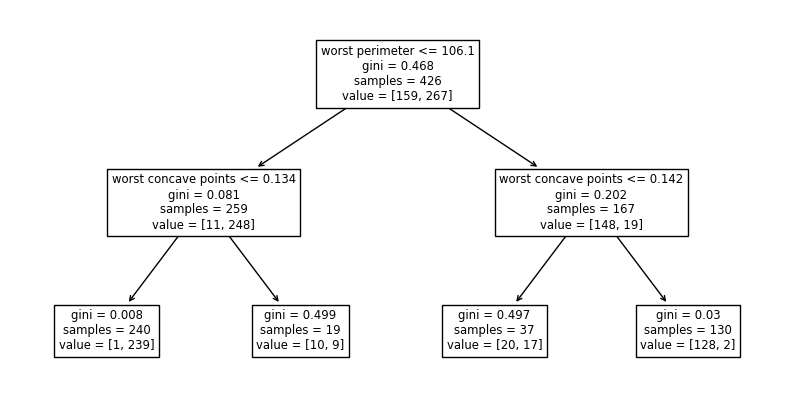

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(tree1, feature_names=cancer.feature_names)

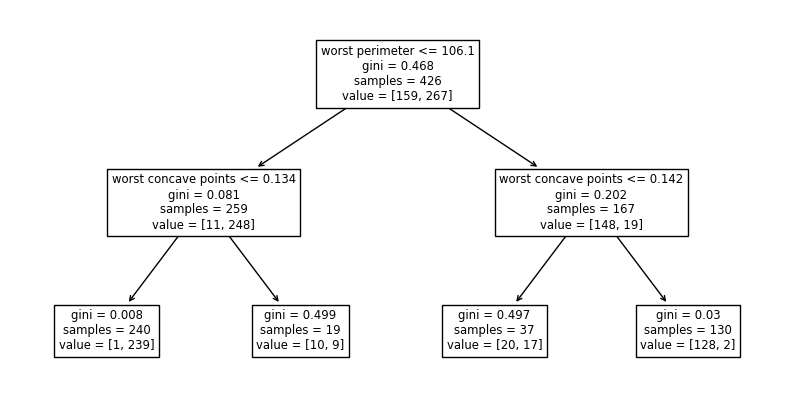

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(tree1, feature_names=cancer.feature_names); # ';' for only plot tree chart

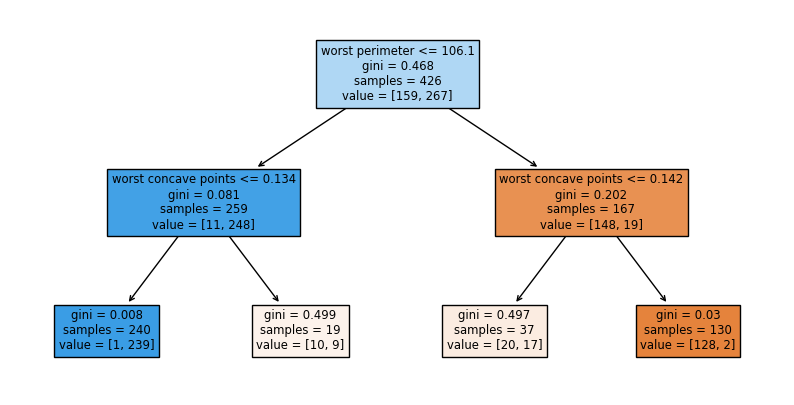

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(tree1, feature_names=cancer.feature_names, filled=True); # 'filled' for colered nodes chart

### Step 3: Parameter Tuning
- Create a grtid search for `max_depth`. Use integer values from 1 to 6.
- Plot the mean train and test scores versus the maximum depth


In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'max_depth': range(1,7)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10, return_train_score=True)

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 7)}, return_train_score=True)

In [21]:
grid.cv_results_

{'mean_fit_time': array([0.008, 0.006, 0.009, 0.009, 0.009, 0.01 ]),
 'std_fit_time': array([0.008, 0.001, 0.007, 0.003, 0.003, 0.003]),
 'mean_score_time': array([0.003, 0.002, 0.002, 0.001, 0.001, 0.001]),
 'std_score_time': array([0.003, 0.001, 0.004, 0.   , 0.   , 0.001]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6}],
 'split0_test_score': array([0.837, 0.884, 0.977, 0.977, 0.977, 0.977]),
 'split1_test_score': array([0.86 , 0.907, 0.907, 0.884, 0.953, 0.953]),
 'split2_test_score': array([0.884, 0.86 , 0.93 , 0.953, 0.953, 0.953]),
 'split3_test_score': array([0.953, 0.953, 0.93 , 0.953, 0.953, 0.907]),
 'split4_test_score': array([0.884, 0.93 , 0.907, 0.907, 0.907, 0.93 ]),
 'split5_test_score': array([0.86 , 0.837, 0.884, 0.9

<Axes: xlabel='param_max_depth'>

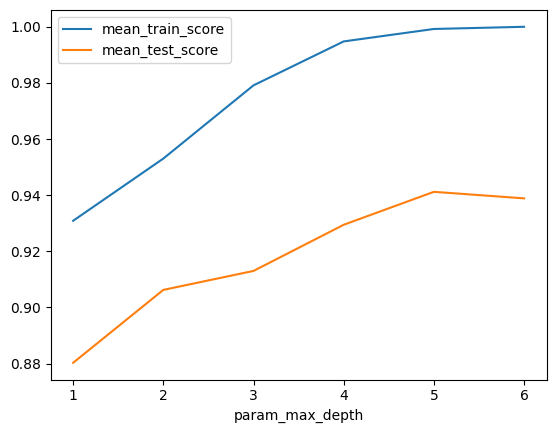

In [22]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'])

### Step 4: Parameter Tuning
- Create a grtid search for `max_leaf_nodes`. Use integer values from 2 to 19.
- Plot the mean train and test scores versus the maximum depth


### Step 5: Extrapolation
- Read the dataset `ram_prices.csv`
- Plot the price versus year. Use logarithmic scale for the price.
- Create train and test datasets by splitting the data as train data being data before year 2000 and test data being data after year 2000
- Use price as the target variable. Take logarithm of the price.
- Train a tree and linear regression model
- Plot the train and test datasets as well as the predictions for the train dataset
- Plot the train and test datasets as well as the predictions for the the entire dataset


In [23]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/

ram_prices = pd.read_csv("ram_price.csv")
ram_prices.head()

Mounted at /content/drive/
/content/drive/My Drive/Datasets


,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [24]:
ram_prices = pd.read_csv("ram_price.csv", index_col=0)
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


In [25]:
ram_prices.shape

(333, 2)

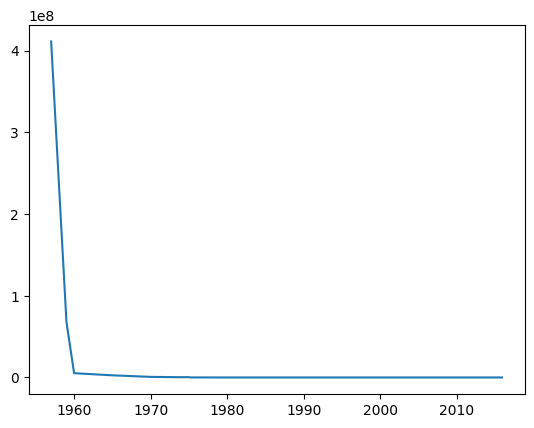

In [26]:
plt.plot(ram_prices.date, ram_prices.price)

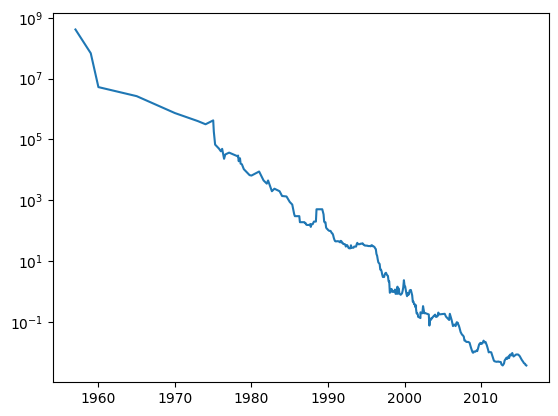

In [27]:
plt.semilogy(ram_prices.date, ram_prices.price)

In [28]:
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

In [29]:
X_train = data_train.date
y_train = data_train.price

In [30]:
X_train.shape

(202,)

In [31]:
xx = np.array(X_train).reshape(-1,1)
xx.shape

(202, 1)

In [32]:
X_train = np.array(X_train)[:, np.newaxis]

In [33]:
X_train.shape

(202, 1)

In [34]:
y_train = np.log(y_train)

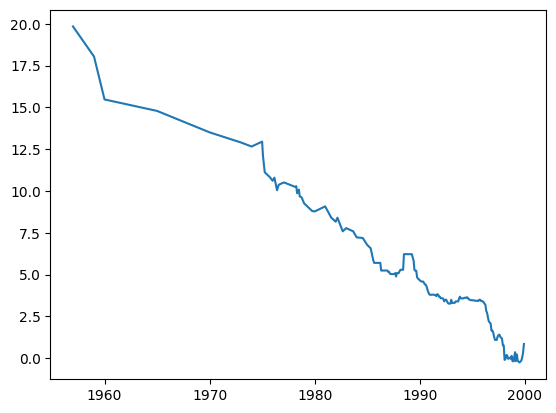

In [35]:
plt.plot(X_train[:,0], y_train)

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)

In [38]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

In [39]:
tree.predict(X_train)

array([1.983e+01, 1.803e+01, 1.547e+01, 1.479e+01, 1.351e+01, 1.284e+01,
       1.284e+01, 1.284e+01, 1.210e+01, 1.112e+01, 1.074e+01, 1.074e+01,
       1.074e+01, 1.004e+01, 1.035e+01, 1.035e+01, 1.035e+01, 1.035e+01,
       9.974e+00, 9.974e+00, 9.655e+00, 9.655e+00, 9.262e+00, 8.793e+00,
       8.793e+00, 9.083e+00, 8.407e+00, 8.285e+00, 8.285e+00, 7.591e+00,
       7.686e+00, 7.686e+00, 7.229e+00, 7.194e+00, 5.958e+00, 5.958e+00,
       5.958e+00, 5.958e+00, 5.958e+00, 5.958e+00, 5.958e+00, 5.958e+00,
       5.958e+00, 5.958e+00, 5.958e+00, 5.958e+00, 5.153e+00, 5.153e+00,
       5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00,
       5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00,
       5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00,
       5.153e+00, 5.153e+00, 5.153e+00, 5.153e+00, 6.190e+00, 6.190e+00,
       6.190e+00, 6.190e+00, 6.190e+00, 6.190e+00, 6.190e+00, 6.190e+00,
       6.190e+00, 6.190e+00, 6.190e+00, 5.252e+00, 

In [40]:
np.exp(tree.predict(X_train))

array([4.110e+08, 6.795e+07, 5.243e+06, 2.642e+06, 7.340e+05, 3.756e+05,
       3.756e+05, 3.756e+05, 1.802e+05, 6.758e+04, 4.634e+04, 4.634e+04,
       4.634e+04, 2.304e+04, 3.139e+04, 3.139e+04, 3.139e+04, 3.139e+04,
       2.147e+04, 2.147e+04, 1.559e+04, 1.559e+04, 1.053e+04, 6.591e+03,
       6.591e+03, 8.800e+03, 4.479e+03, 3.964e+03, 3.964e+03, 1.980e+03,
       2.178e+03, 2.178e+03, 1.379e+03, 1.331e+03, 3.868e+02, 3.868e+02,
       3.868e+02, 3.868e+02, 3.868e+02, 3.868e+02, 3.868e+02, 3.868e+02,
       3.868e+02, 3.868e+02, 3.868e+02, 3.868e+02, 1.729e+02, 1.729e+02,
       1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02,
       1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02,
       1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02,
       1.729e+02, 1.729e+02, 1.729e+02, 1.729e+02, 4.877e+02, 4.877e+02,
       4.877e+02, 4.877e+02, 4.877e+02, 4.877e+02, 4.877e+02, 4.877e+02,
       4.877e+02, 4.877e+02, 4.877e+02, 1.910e+02, 

In [41]:
tree_train_predict = np.exp(tree.predict(X_train))
lr_train_predict = np.exp(linear_reg.predict(X_train))

In [42]:
#np.exp(log(x)) = x

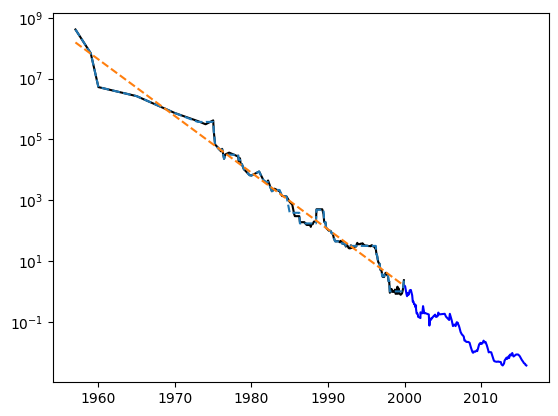

In [43]:
plt.semilogy(data_train.date, data_train.price, label='Training Data', c='k')
plt.semilogy(data_test.date, data_test.price, label='Test Data', c='b')
plt.semilogy(data_train.date, tree_train_predict, '--', label='Tree Prediction')
plt.semilogy(data_train.date, lr_train_predict, '--', label='Linear Prediction')

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
tree = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)

In [46]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

In [47]:
tree_train_predict = np.exp(tree.predict(X_train))
lr_train_predict = np.exp(linear_reg.predict(X_train))

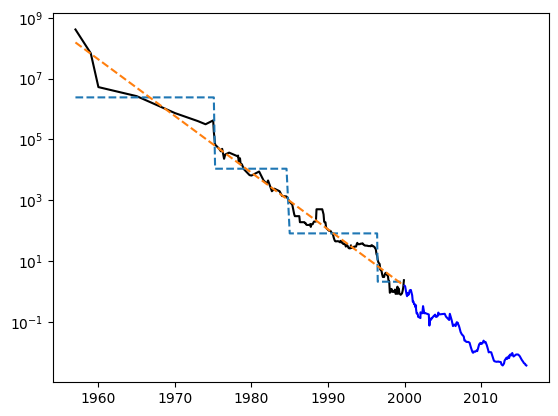

In [48]:
plt.semilogy(data_train.date, data_train.price, label='Training Data', c='k')
plt.semilogy(data_test.date, data_test.price, label='Test Data', c='b')
plt.semilogy(data_train.date, tree_train_predict, '--', label='Tree Prediction')
plt.semilogy(data_train.date, lr_train_predict, '--', label='Linear Prediction')

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
tree = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)

In [51]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

In [52]:
tree_train_predict = np.exp(tree.predict(X_train))
lr_train_predict = np.exp(linear_reg.predict(X_train))

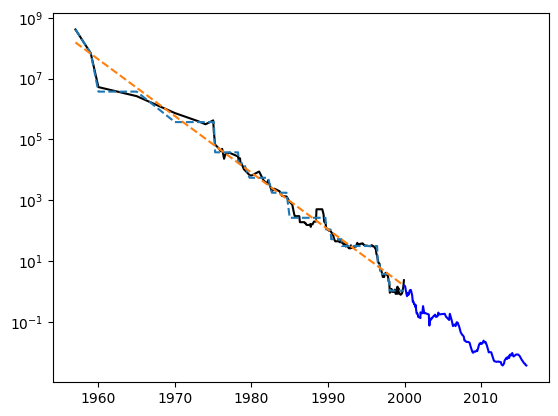

In [53]:
plt.semilogy(data_train.date, data_train.price, label='Training Data', c='k')
plt.semilogy(data_test.date, data_test.price, label='Test Data', c='b')
plt.semilogy(data_train.date, tree_train_predict, '--', label='Tree Prediction')
plt.semilogy(data_train.date, lr_train_predict, '--', label='Linear Prediction')

In [54]:
X_all = np.array(ram_prices.date)[:, np.newaxis]

In [55]:
tree_train_predictall = np.exp(tree.predict(X_all))
lr_train_predictall = np.exp(linear_reg.predict(X_all))

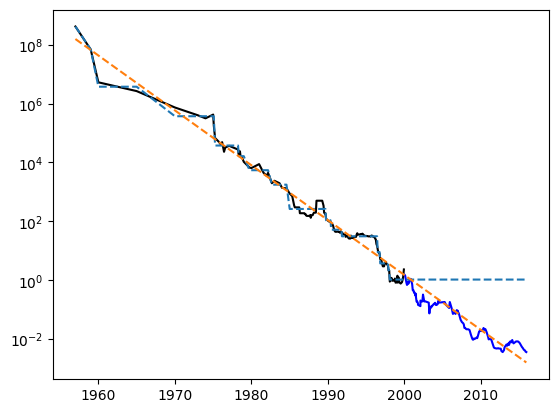

In [56]:
plt.semilogy(data_train.date, data_train.price, label='Training Data', c='k')
plt.semilogy(data_test.date, data_test.price, label='Test Data', c='b')
plt.semilogy(ram_prices.date, tree_train_predictall, '--', label='Tree Prediction')
plt.semilogy(ram_prices.date, lr_train_predictall, '--', label='Linear Prediction')

### Step 6: Feature Importance
- Load Iris dataset using `from sklearn.datasets import load_iris`
- Train a DT with `max_leaf_nodes=6`
- Plot the decision tree 
- Print the feature importance using `tree.feature_importances_`
- Create a bar graph for feature importance

###do yo think, the magnitude of a coefficient in a linear model reflects the importance of the corresponding feature?

**house price:**

- a1 ---> squarefootage
- a2 ---> room number
- a3 ---> bath number
.
.
.

a2 >> a2 if you do not scale your dataset,   



for each 1 unit increase of squarefootage, house price increases by a1 dollars

for each 1 unit increase of room number, house price increases by a2 dollars


for each 1 unit increase of squarefootage, house price increases by a10 dollars

for each 1 unit increase of room number, house price increases by 10 dollars

as a result scaling of dataset is very important comparing the coefficients of different features




**feature importance of decision trees**

X_all

x1, x2, x3, ... xp

the feature which gives you the purest splits and/or the feature that is used more frequently

that feature would have a higher feature importance than the others

In [58]:
from sklearn.datasets import load_iris

In [61]:
iris = load_iris()
Xi = iris.data
yi = iris.target
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, random_state=0, stratify=yi)

In [62]:
tree3 = DecisionTreeClassifier(max_leaf_nodes=6)
tree3.fit(Xi_train,yi_train)

DecisionTreeClassifier(max_leaf_nodes=6)

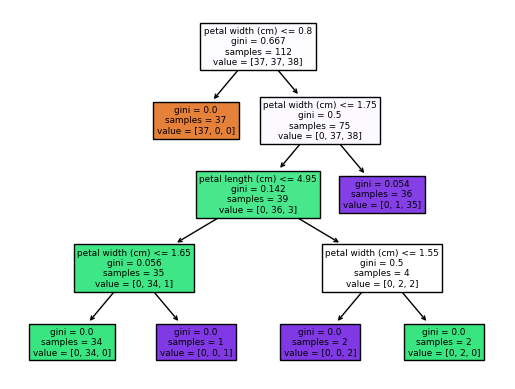

In [64]:
from numpy.ma.core import filled
plot_tree(tree3, feature_names = iris.feature_names, filled=True);

In [65]:
tree3.feature_importances_

array([0.   , 0.   , 0.022, 0.978])

In [66]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
pd.DataFrame(Xi).corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


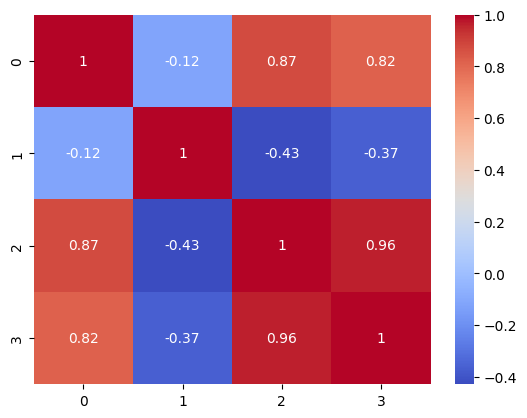

In [70]:
# Generate correlation matrix
corr_matrix = pd.DataFrame(Xi).corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.show()

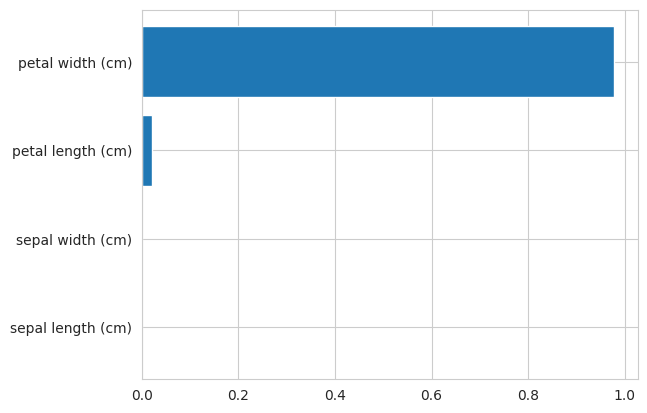

In [83]:
plt.barh(range(4), tree3.feature_importances_)
plt.yticks(range(4), iris.feature_names);

**Change randon_state value**

In [84]:
from sklearn.datasets import load_iris

In [106]:
#increase random_state from 0 to 13
iris = load_iris()
Xi = iris.data
yi = iris.target
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, random_state=11, stratify=yi)

In [107]:
tree3 = DecisionTreeClassifier(max_leaf_nodes=6)
tree3.fit(Xi_train,yi_train)

DecisionTreeClassifier(max_leaf_nodes=6)

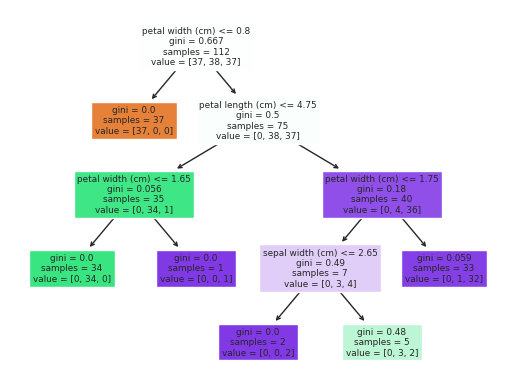

In [102]:
from numpy.ma.core import filled
plot_tree(tree3, feature_names = iris.feature_names, filled=True);

In [103]:
pd.DataFrame(Xi).corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


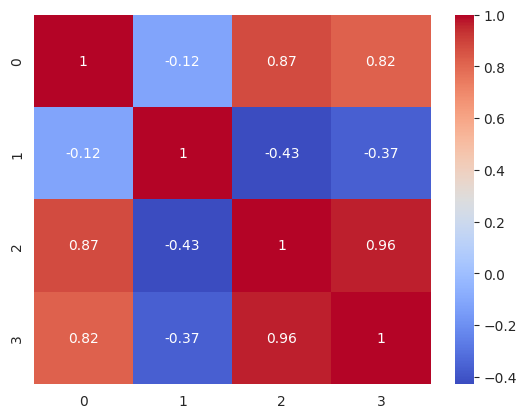

In [104]:
# Generate correlation matrix
corr_matrix = pd.DataFrame(Xi).corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.show()

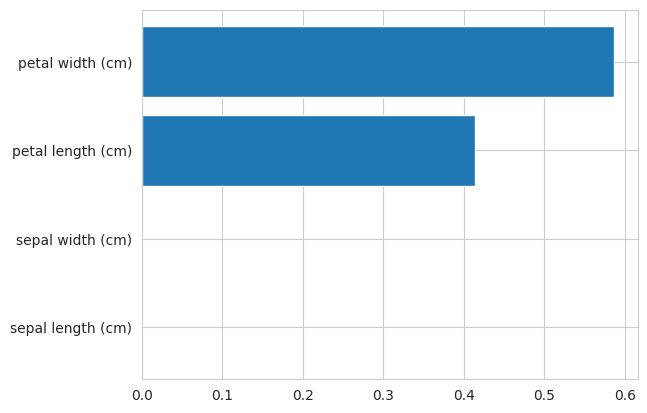

In [108]:
plt.barh(range(4), tree3.feature_importances_)
plt.yticks(range(4), iris.feature_names);

small change the way you split data train and test will change the result